<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


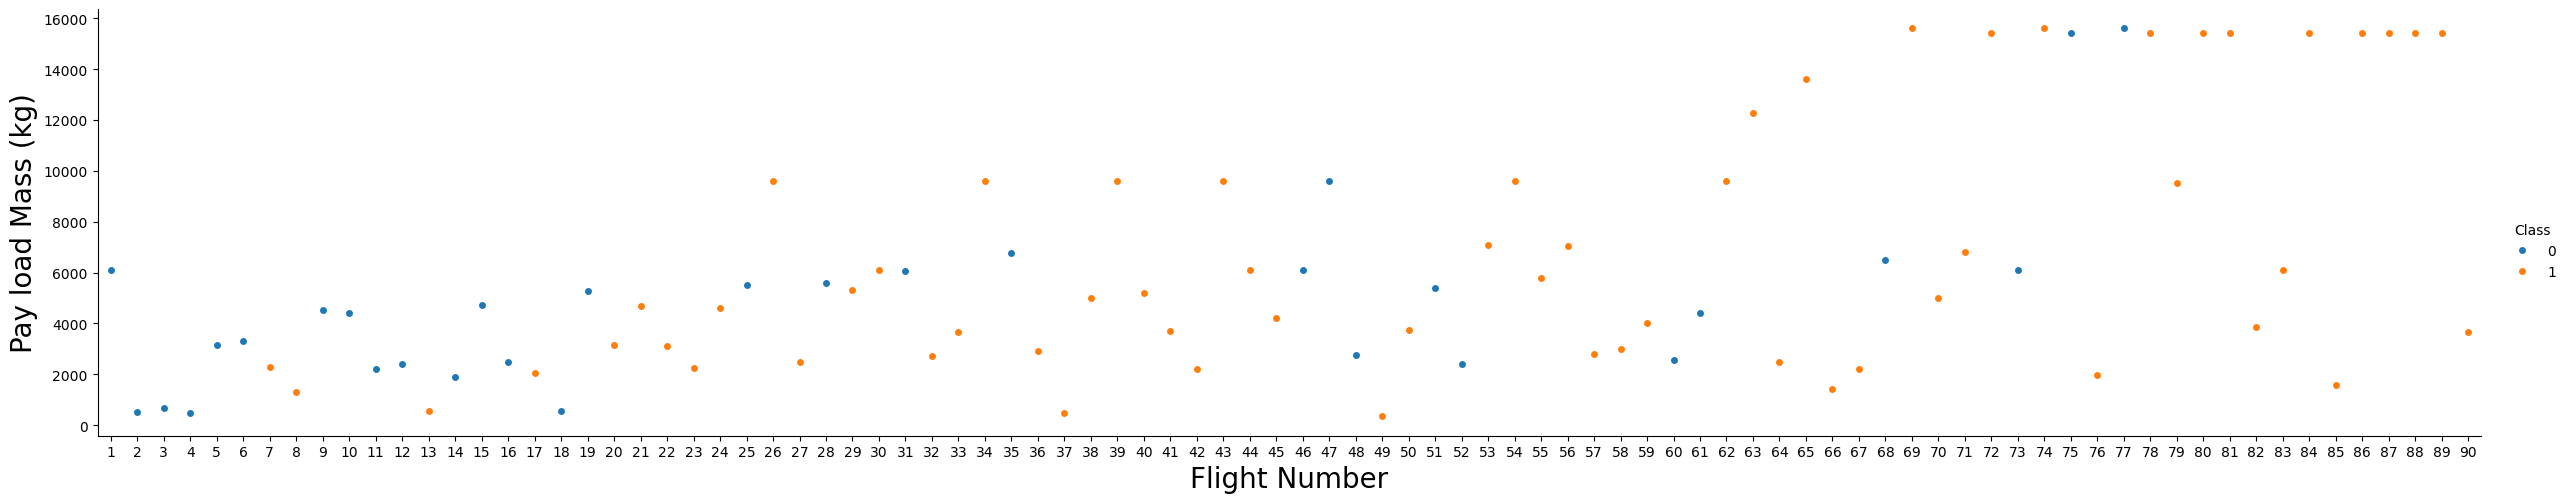

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


In [6]:
import pandas as pd

# Define the necessary data lists if they are not defined yet
FlightNumber = list(range(1, 11))  # Just an example, replace with your actual data length
Date = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
        '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10']  # Example dates
BoosterVersion = ['v1.0', 'v1.1', 'v1.1', 'v1.2', 'v1.2', 'v1.2', 'v1.2', 'v2.0', 'v2.1', 'v2.1']
PayloadMass = [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400]  # Example payloads
Orbit = ['LEO', 'GTO', 'LEO', 'LEO', 'MEO', 'GTO', 'GTO', 'LEO', 'LEO', 'GTO']
LaunchSite = ['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A', 'CCAFS SLC 40', 'CCAFS SLC 40', 'KSC LC 39A', 'CCAFS SLC 40', 'KSC LC 39A', 'CCAFS SLC 40', 'KSC LC 39A']
Outcome = ['Success', 'Failure', 'Success', 'Success', 'Failure', 'Success', 'Failure', 'Success', 'Success', 'Failure']
Flights = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
GridFins = [True, False, True, True, False, True, False, True, True, False]
Reused = [False, False, True, True, False, True, True, True, True, False]
Legs = [False, False, True, True, False, True, True, True, True, False]
LandingPad = ['OCISLY', 'OCISLY', 'LZ-1', 'LZ-1', 'LZ-1', 'OCISLY', 'OCISLY', 'OCISLY', 'OCISLY', 'OCISLY']
Block = [1, 2, 2, 3, 3, 4, 4, 5, 5, 5]
ReusedCount = [0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
Serial = ['B0001', 'B0002', 'B0003', 'B0004', 'B0005', 'B0006', 'B0007', 'B0008', 'B0009', 'B0010']
Longitude = [-80.5772, -120.6108, -80.5772, -80.5772, -80.5772, -80.5772, -80.5772, -80.5772, -80.5772, -80.5772]
Latitude = [28.5613, 34.6322, 28.5613, 28.5613, 28.5613, 28.5613, 28.5613, 28.5613, 28.5613, 28.5613]

# Construct launch_dict
launch_dict = {
    'FlightNumber': FlightNumber,
    'Date': Date,
    'BoosterVersion': BoosterVersion,
    'PayloadMass': PayloadMass,
    'Orbit': Orbit,
    'LaunchSite': LaunchSite,
    'Outcome': Outcome,
    'Flights': Flights,
    'GridFins': GridFins,
    'Reused': Reused,
    'Legs': Legs,
    'LandingPad': LandingPad,
    'Block': Block,
    'ReusedCount': ReusedCount,
    'Serial': Serial,
    'Longitude': Longitude,
    'Latitude': Latitude
}

# Create the DataFrame from the dictionary
launch_df = pd.DataFrame(launch_dict)

# Display the first few rows to ensure everything is correctly assembled
print(launch_df.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2020-01-01           v1.0          500   LEO  CCAFS SLC 40   
1             2  2020-01-02           v1.1          600   GTO   VAFB SLC 4E   
2             3  2020-01-03           v1.1          700   LEO    KSC LC 39A   
3             4  2020-01-04           v1.2          800   LEO  CCAFS SLC 40   
4             5  2020-01-05           v1.2          900   MEO  CCAFS SLC 40   

   Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  Success        1      True   False  False     OCISLY      1            0   
1  Failure        1     False   False  False     OCISLY      2            1   
2  Success        1      True    True   True       LZ-1      2            1   
3  Success        1      True    True   True       LZ-1      3            1   
4  Failure        1     False   False  False       LZ-1      3            2   

  Serial  Longitude  Latitude  
0  B0001   -80.577

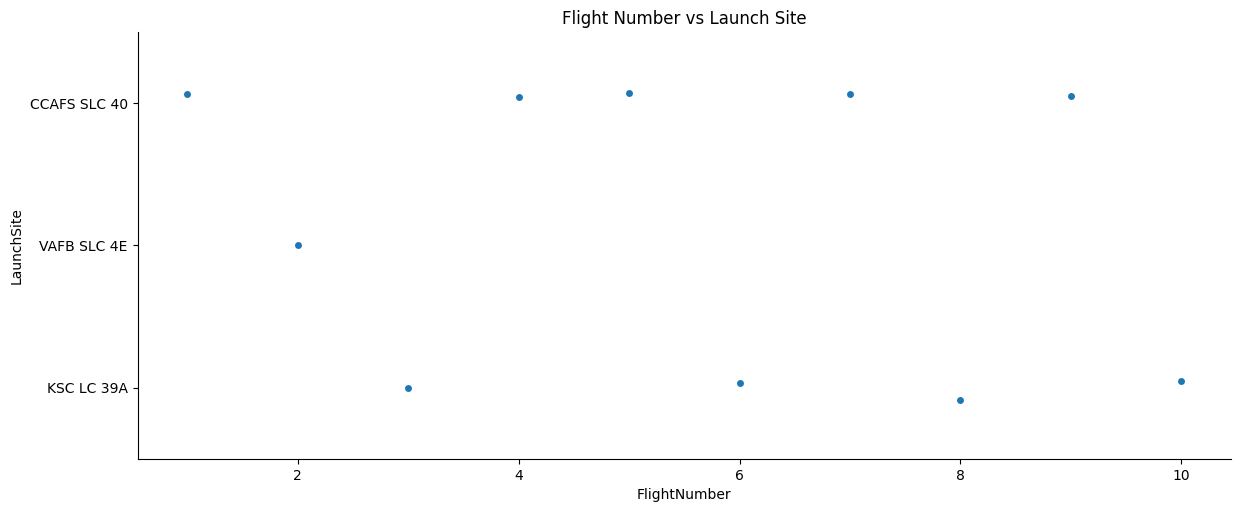

In [8]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
sns.catplot(x='FlightNumber', y='LaunchSite', data=launch_df, aspect=2.5)

# Set the title
plt.title('Flight Number vs Launch Site')

# Show the plot
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


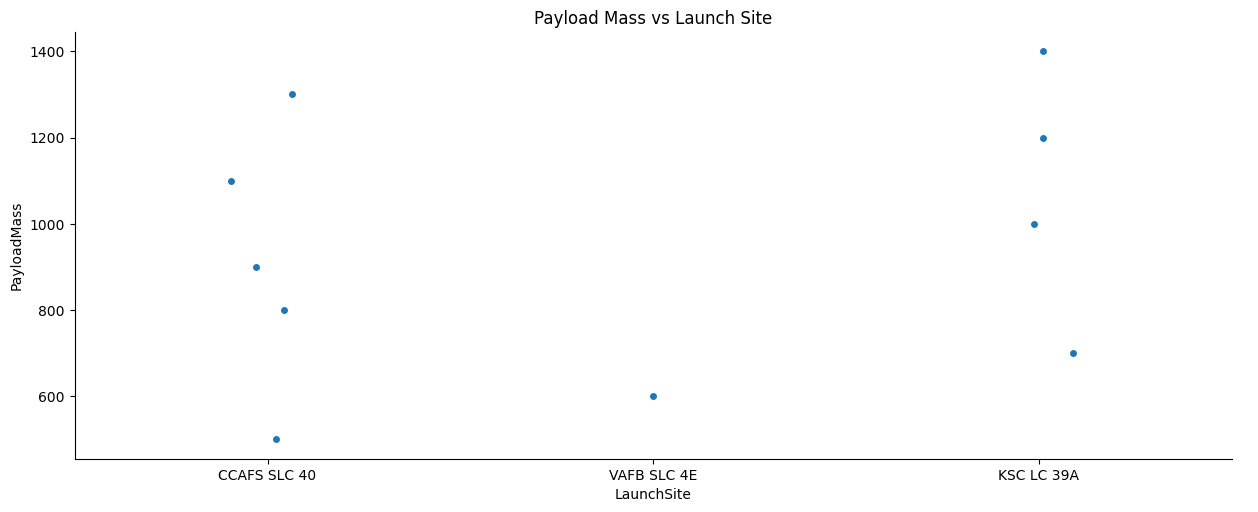

In [9]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
sns.catplot(x='LaunchSite', y='PayloadMass', data=launch_df, aspect=2.5)

# Set the title
plt.title('Payload Mass vs Launch Site')

# Show the plot
plt.show()


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


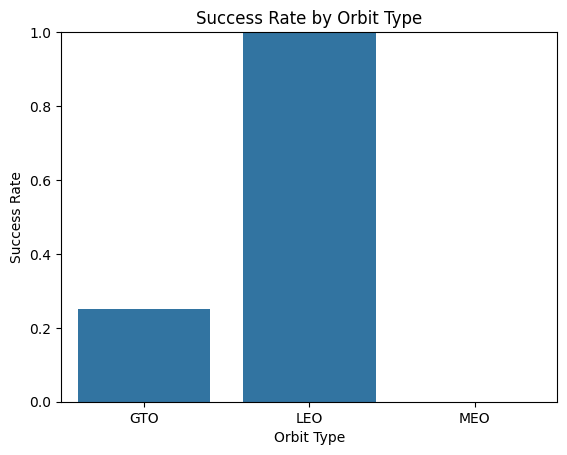

In [10]:
# HINT use groupby method on Orbit column and get the mean of Class column
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate success rate for each orbit type
launch_df['Success'] = launch_df['Outcome'].apply(lambda x: 1 if 'Success' in x else 0)
success_rate_orbit = launch_df.groupby('Orbit')['Success'].mean().reset_index()

# Create the bar chart
sns.barplot(x='Orbit', y='Success', data=success_rate_orbit)

# Set the title and labels
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.ylim(0, 1)  # Setting the y-axis from 0 to 1 for better readability

# Show the plot
plt.show()


Analyze the plotted bar chart to identify which orbits have the highest success rates.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


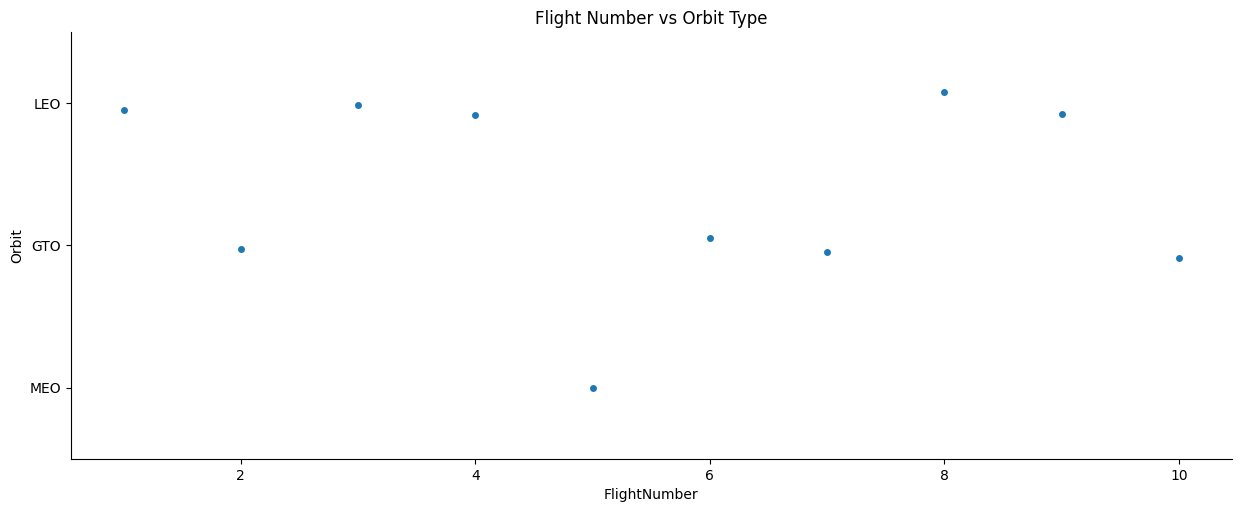

In [11]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
sns.catplot(x='FlightNumber', y='Orbit', data=launch_df, aspect=2.5)

# Set the title
plt.title('Flight Number vs Orbit Type')

# Show the plot
plt.show()


You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


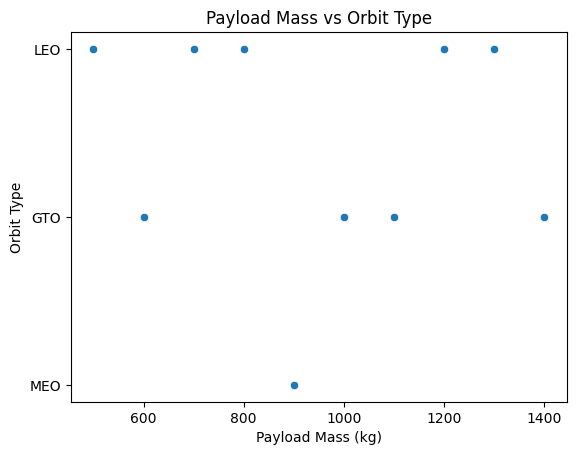

In [12]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
sns.scatterplot(x='PayloadMass', y='Orbit', data=launch_df)

# Set the title and labels
plt.title('Payload Mass vs Orbit Type')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')

# Show the plot
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [13]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [37]:
import pandas as pd

# Define a sample launch_dict for testing (adjust as necessary)
launch_dict = {
    'Date': ['2010-06-04', '2012-03-20', '2014-07-14', '2016-05-06', '2017-03-20'],
    'Outcome': ['Success', 'Failure', 'Success', 'Failure', 'Success'],
    'PayloadMass': [5000, 6000, 7000, 8000, 9000]
}

# Create the DataFrame from the dictionary
launch_df = pd.DataFrame(launch_dict)
print(launch_df)


         Date  Outcome  PayloadMass
0  2010-06-04  Success         5000
1  2012-03-20  Failure         6000
2  2014-07-14  Success         7000
3  2016-05-06  Failure         8000
4  2017-03-20  Success         9000


In [38]:
launch_df['Date'] = pd.to_datetime(launch_df['Date'], errors='coerce')
print(launch_df['Date'].head())


0   2010-06-04
1   2012-03-20
2   2014-07-14
3   2016-05-06
4   2017-03-20
Name: Date, dtype: datetime64[ns]


In [39]:
launch_df['Year'] = launch_df['Date'].dt.year
launch_df['Success'] = launch_df['Outcome'].apply(lambda x: 1 if 'Success' in x else 0)
print(launch_df[['Year', 'Success']].head())


   Year  Success
0  2010        1
1  2012        0
2  2014        1
3  2016        0
4  2017        1


In [40]:
yearly_success_rate = launch_df.groupby('Year')['Success'].mean().reset_index()
print(yearly_success_rate.head())


   Year  Success
0  2010      1.0
1  2012      0.0
2  2014      1.0
3  2016      0.0
4  2017      1.0


<ipython-input-50-6fcd6d220891>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Success', data=yearly_success_rate, palette="viridis")


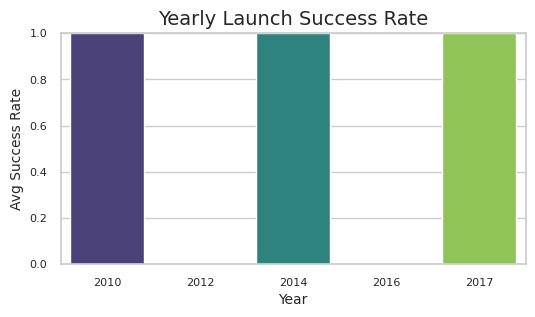

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create the bar plot with a much smaller size
plt.figure(figsize=(6, 3))
sns.barplot(x='Year', y='Success', data=yearly_success_rate, palette="viridis")

# Title and labels
plt.title('Yearly Launch Success Rate', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Avg Success Rate', fontsize=10)
plt.ylim(0, 1)

# Smaller ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


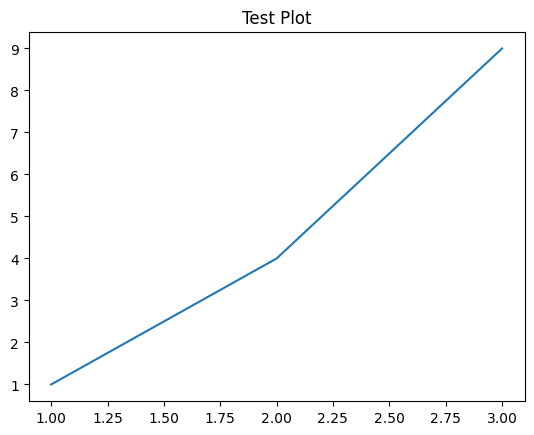

In [27]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
import matplotlib.pyplot as plt

# Create a simple test plot
plt.plot([1, 2, 3], [1, 4, 9])
plt.title('Test Plot')
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [51]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [55]:
# HINT: Use get_dummies() function on the categorical columns
import pandas as pd

# Assuming 'launch_df' is your main DataFrame
print(launch_df.columns)


Index(['Date', 'Outcome', 'PayloadMass', 'Year', 'Success'], dtype='object')


In [57]:
# HINT: Use get_dummies() function on the categorical columns
import pandas as pd

# Ensure correct column names are used
columns_to_encode = ['Date', 'Outcome', 'PayloadMass', 'Year', 'Success']  # Adjust as per actual column names

# Apply get_dummies to create dummy variables
features_one_hot = pd.get_dummies(launch_df, columns=columns_to_encode)

# Display the first few rows of the result
print(features_one_hot.head())


   Date_2010-06-04 00:00:00  Date_2012-03-20 00:00:00  \
0                      True                     False   
1                     False                      True   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   Date_2014-07-14 00:00:00  Date_2016-05-06 00:00:00  \
0                     False                     False   
1                     False                     False   
2                      True                     False   
3                     False                      True   
4                     False                     False   

   Date_2017-03-20 00:00:00  Outcome_Failure  Outcome_Success  \
0                     False            False             True   
1                     False             True            False   
2                     False            False             True   
3                     False             True          

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [58]:
# HINT: use astype function
# Cast all numeric columns to float64
features_one_hot = features_one_hot.astype('float64')

# Display the dtypes to confirm the change
print(features_one_hot.dtypes)


Date_2010-06-04 00:00:00    float64
Date_2012-03-20 00:00:00    float64
Date_2014-07-14 00:00:00    float64
Date_2016-05-06 00:00:00    float64
Date_2017-03-20 00:00:00    float64
Outcome_Failure             float64
Outcome_Success             float64
PayloadMass_5000            float64
PayloadMass_6000            float64
PayloadMass_7000            float64
PayloadMass_8000            float64
PayloadMass_9000            float64
Year_2010                   float64
Year_2012                   float64
Year_2014                   float64
Year_2016                   float64
Year_2017                   float64
Success_0                   float64
Success_1                   float64
dtype: object


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
